# week1_08: Model free

## Q-learning 

_Reference: based on Practical RL_ [week03](https://github.com/yandexdataschool/Practical_RL/tree/master/week03_model_free)

This notebook will guide you through implementation of vanilla Q-learning algorithm.

You need to implement QLearningAgent (follow instructions for each method) and use it on a number of tests below.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# In google collab, uncomment this:
# !wget https://bit.ly/2FMJP5K -q -O setup.py
# !bash setup.py 2>&1 1>stdout.log | tee stderr.log

# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it

In [1]:
import os

In [4]:
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ["DISPLAY"] = ":1"

In [5]:
%%writefile qlearning.py
from collections import defaultdict


class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on https://inst.eecs.berkeley.edu/~cs188/sp19/projects.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value
        !!!Important!!!
        Note: please avoid using self._qValues directly.
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

    # ---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q-values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q-values can be negative.
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return 0.0
        if len(possible_actions) == 0:
            return 0.0

        # YOUR CODE HERE
        value = None

        return value

    def update(self, state, action, reward, next_state):
        """
        You should do your Q-Value update here:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """

        # agent parameters
        gamma = self.discount
        learning_rate = self.alpha

        # YOUR CODE HERE
        Q_new = None

        self.set_qvalue(state, action, Q_new)

    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q-values).
        """
        possible_actions = self.get_legal_actions(state)

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        # YOUR CODE HERE
        best_action = None

        return best_action

    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.
        With probability self.epsilon, we should take a random action.
            otherwise - the best policy action (self.get_best_action).

        Note: To pick randomly from a list, use random.choice(list).
              To pick True or False with a given probablity, generate uniform number in [0, 1]
              and compare it with your probability
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)
        chosen_action = None

        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        # agent parameters:
        epsilon = self.epsilon

        # YOUR CODE HERE

        return chosen_action

Overwriting qlearning.py


## Try it on taxi

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qlearning import QLearningAgent

In [6]:
env = gym.make("Taxi-v3")
n_actions = env.action_space.n

In [7]:
agent = QLearningAgent(
    alpha=0.5, epsilon=0.25, discount=0.99, get_legal_actions=lambda s: range(n_actions)
)

In [8]:
def play_and_train(env, agent, t_max=10 ** 4):
    """
    This function should
    - run a full game, actions given by agent's e-greedy policy
    - train agent using agent.update(...) whenever it is possible
    - return total reward
    """
    total_reward = 0.0
    state = env.reset()

    for t in range(t_max):

        # YOUR CODE HERE: get agent to pick action given state s.
        action = None

        next_state, reward, done, _ = env.step(action)

        # YOUR CODE HERE: train (update) agent for state s

        state = next_state  # noqa: F841
        total_reward += reward
        if done:
            break

    return total_reward

In [ ]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        print("eps =", agent.epsilon, "mean reward =", np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()

# Binarized state spaces

Use agent to train efficiently on CartPole-v0.
This environment has a continuous set of possible states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

first state:[-0.00955419  0.00928682  0.03222283  0.02890697]


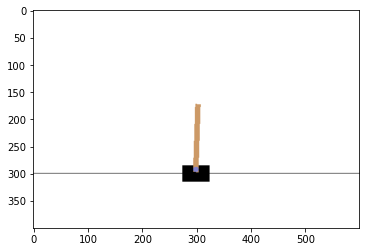

In [9]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s" % (env.reset()))
plt.imshow(env.render("rgb_array"))

In [10]:
env.close()

### Play a few games

We need to estimate observation distributions. To do so, we'll play a few games and record all states.

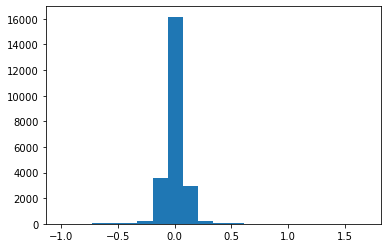

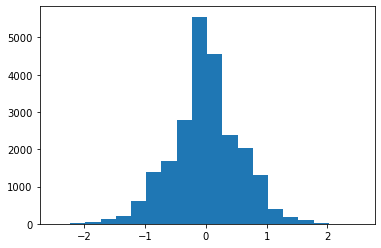

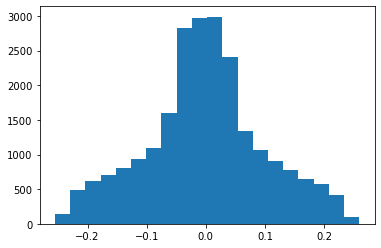

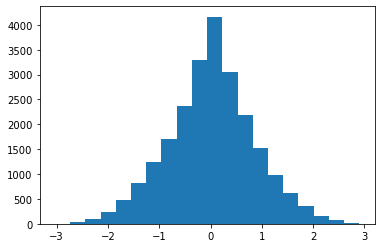

In [11]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        state, reward, done, _ = env.step(env.action_space.sample())
        all_states.append(state)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

## Binarize environment

In [ ]:
from gym.core import ObservationWrapper

In [ ]:
class Binarizer(ObservationWrapper):
    def observation(self, state):

        # state = <round state to some amount digits.>
        # hint: you can do that with round(x,n_digits)
        # you will need to pick a different n_digits for each dimension

        # YOUR CODE HERE

        return tuple(state)

In [ ]:
env = Binarizer(gym.make("CartPole-v0"))

In [ ]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        state, reward, done, _ = env.step(env.action_space.sample())
        all_states.append(state)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

## Learn binarized policy

Now let's train a policy that uses binarized state space.

__Tips:__ 
* If your binarization is too coarse, your agent may fail to find optimal policy. In that case, change binarization. 
* If your binarization is too fine-grained, your agent will take much longer than 1000 steps to converge. You can either increase number of iterations and decrease epsilon decay or change binarization.
* Having 10^3 ~ 10^4 distinct states is recommended (`len(QLearningAgent._qvalues)`), but not required.
* A reasonable agent should get to an average reward of >=50.

In [ ]:
agent = QLearningAgent(
    alpha=0.5, epsilon=0.25, discount=0.99, get_legal_actions=lambda s: range(n_actions)
)

In [ ]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env, agent))

    # OPTIONAL YOUR CODE: adjust epsilon
    if i % 100 == 0:
        clear_output(True)
        print("eps =", agent.epsilon, "mean reward =", np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()